Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n+1 различными точками, через которые он проходит.

w0+w1*x+w2*x**2+...+wn*x**n

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve

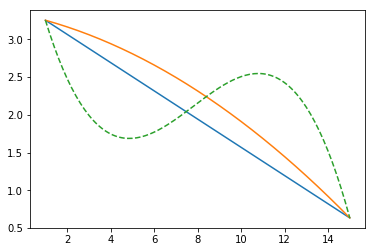

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]
[3.25221687 1.74684595 2.50541641 0.63522142]


In [76]:
import numpy as np
from scipy import linalg
from matplotlib import pylab as plt

# многочлен (полином) первой степени
def f1(x):
    return  k1[0] + k1[1]*x

# многочлен (полином) второй степени
def f2(x):
    return  k2[0] + k2[1]*x + k2[2]*x**2

# многочлен (полином) третей степени
def f3(x):
    return  k3[0] + k3[1]*x + k3[2]*x**2 + k3[3]*x**3


pnt = np.arange(1., 15.1, 0.1)

# Ax = b система линейных уравнений...

# многочлен 3 степени:
# w это к в коде!
# w0 = 1, видимо всегда, я не понимаю пока почему ...
# В точке 1 получаем: w0 + w1 * 1 + w2*1**2 + w3*1**3 = sin(1/5) * exp(1/10) + 5*exp(-1/2)
# ...
# В точке 15 получаем: w0 + w1 * 15 + w2*1**2 + w3*15**3 = sin(1/5) * exp(1/10) + 5*exp(-1/2)

# Получаем систему уравнений:
# w0 + 1 * w1 + 1*w2 + 1*w3 = 3.25221687
# ...
# w0 + 15 * w1 + 225*w2 + 3375*w3 = 0.63522142

# т.е. линейная матрица будет вида:
# |1   1   1     1 |   |3.252|
# ...
# |1  15  225  3375| = |0.635|
# вычисляем значения в точках 1 и 15!
pnt_x1 = np.array([1, 15], dtype=float)
b1 = np.sin(pnt_x1 / 5.) * np.exp(pnt_x1 / 10.) + 5. * np.exp(-pnt_x1 / 2.)
A1 = np.array([[1, 1], [1, 15]], dtype=float)
k1 = linalg.solve(A1, b1)


# вычисляем значения в точках 1, 8 и 15!
pnt_x2 = np.array([1, 8, 15], dtype=float)
b2 = np.sin(pnt_x2 / 5.) * np.exp(pnt_x2 / 10.) + 5. * np.exp(-pnt_x2 / 2.)
A2 = np.array([[1, 1, 1], [1, 8, 8**2], [1, 15, 15**2]], dtype=float)
k2 = linalg.solve(A2, b2)

# вычисляем значения в точках 1, 4, 10 и 15!
pnt_x3 = np.array([1, 4, 10, 15], dtype=float)
b3 = np.sin(pnt_x3 / 5.) * np.exp(pnt_x3 / 10.) + 5. * np.exp(-pnt_x3 / 2.)
A3 = np.array([[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]], dtype=float)
k3 = linalg.solve(A3, b3)

plt.plot(pnt, f1(pnt), '-', pnt, f2(pnt), '-', pnt, f3(pnt), '--')
plt.show()

# print A3
print k3
print b3